In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [3]:
#folder = "../test_results/spiral_normal"
#folder = "../test_results/spiral_extra_assembly_comp"
#folder = "../test_results/spiral_damaged_screw_thread"
folder = "../test_results/seq_damaged_screw_thread"
filename = "8_P_to_A_2020-11-02_13-46-52.csv" # "test_sd.csv" # "three_screw_test.csv"
file_path = Path(folder) / Path(filename)

print(file_path)

df = pd.read_csv(file_path, sep=" ")
df.head()

..\test_results\seq_damaged_screw_thread\8_P_to_A_2020-11-02_13-46-52.csv


,timestamp,target_q_0,target_q_1,target_q_2,target_q_3,target_q_4,target_q_5,target_qd_0,target_qd_1,target_qd_2,...,output_double_register_26,output_double_register_27,output_bit_register_64,output_bit_register_65,output_bit_register_66,output_bit_register_67,output_bit_register_70,output_bit_register_71,output_bit_register_72,label
0,15618.321,0.086743,-1.085944,1.30411,-0.174707,-0.037001,-1.605179,0.0,0.0,0.0,...,0.5,0.0,False,False,False,False,False,False,False,normal
1,15618.331,0.086743,-1.085944,1.30411,-0.174707,-0.037001,-1.605179,0.0,0.0,0.0,...,0.5,0.0,False,False,False,False,False,False,False,normal
2,15618.341,0.086743,-1.085944,1.30411,-0.174707,-0.037001,-1.605179,0.0,0.0,0.0,...,0.5,0.0,False,False,False,False,False,False,False,normal
3,15618.351,0.086743,-1.085944,1.30411,-0.174707,-0.037001,-1.605179,0.0,0.0,0.0,...,0.5,0.0,False,False,False,False,False,False,False,normal
4,15618.361,0.086743,-1.085944,1.30411,-0.174707,-0.037001,-1.605179,0.0,0.0,0.0,...,0.5,0.0,False,False,False,False,False,False,False,normal


In [23]:
sd_busy = df['output_bit_register_70']
process_nok = df['output_bit_register_71']
process_ok = df['output_bit_register_72']

command_res = df['output_int_register_24']

achieved_torque = df['output_double_register_24']
current_torque = df['output_double_register_25']
target_torque = df['output_double_register_26']
torque_angle = df['output_double_register_27']


move_pin_register = df['output_bit_register_64']
move_home_register = df['output_bit_register_65']
loosen_register = df['output_bit_register_66']
tighten_register = df['output_bit_register_67']
to_plate_register = df['output_int_register_25']
from_plate_register = df['output_int_register_26']


qd_0 = df['actual_qd_0']
qd_1 = df['actual_qd_1']
qd_2 = df['actual_qd_2']
qd_3 = df['actual_qd_3']
qd_4 = df['actual_qd_4']
qd_5 = df['actual_qd_5']

anomaly_labels = df['label']

t = df['output_int_register_25']
#print(np.unique(current_torque))
print(len(np.unique(current_torque)))
print(np.unique(anomaly_labels))

247
['damaged_screw_thread' 'normal']


In [4]:
print(f"Sd_busy: {np.unique(sd_busy)}")
# print(f"process_nok: {np.unique(process_nok)}")
# print(f"process_ok: {np.unique(process_ok)}")
print(f"command_res:  {np.unique(command_res)}")
#print(f"achieved_torque: {np.unique(achieved_torque)}")
#print(f"current_torque: {np.unique(current_torque)}")
print(f"target_torque: {np.unique(target_torque)}")
print(f"torque_angle: {np.unique(torque_angle)}")
print(f"pin register: {np.unique(pin_register)}")

Sd_busy: [False  True]
command_res:  [0]
target_torque: [0.  0.5]
torque_angle: [0.]
pin register: [1 2 3 4 5]


In [ ]:
print(len(df['output_bit_register_70'])) # get_sd_busy
print(len(df['timestamp']))

In [ ]:
# check if screwdriver values are in csv
ts = "timestamp"
print(f"Timestamp is in data: {ts in df.columns}")

sd_command_res = "sd_Command_results"
print(f"{sd_command_res} is in data: {sd_command_res in df.columns}")

In [ ]:
for col in df.columns:
    print(col)

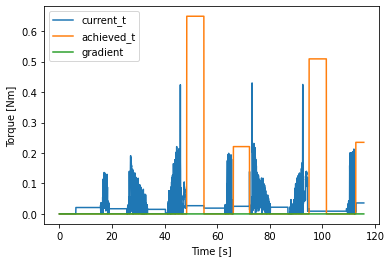

In [5]:
# Plot
t = df.timestamp - df.timestamp[0]
plt.plot(t, current_torque, label='current_t')
plt.plot(t, achieved_torque, label='achieved_t')
plt.plot(t, torque_angle, label='gradient')
plt.xlabel('Time [s]')
plt.ylabel('Torque [Nm]')
plt.legend()
plt.show()


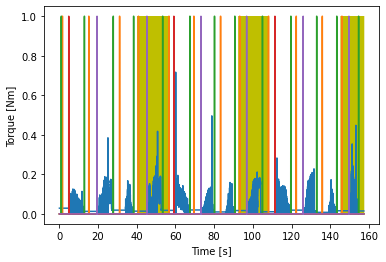

In [92]:
# Plot registers
plot_len = -1
t = df.timestamp - df.timestamp[0]
plt.plot(t[0:plot_len], current_torque[0:plot_len])
# plt.plot(t[0:plot_len], abs(qd_0[0:plot_len]), label='qd_0')
# plt.plot(t[0:plot_len], abs(qd_3[0:plot_len]), label='qd_3')
# plt.plot(t[0:plot_len], to_plate_register[0:plot_len], label='to_plate_reg')
# plt.plot(t[0:plot_len], from_plate_register[0:plot_len], label='from_plate_reg')
plt.plot(t[0:plot_len], move_pin_register[0:plot_len], label='move_pin_reg')
plt.plot(t[0:plot_len], move_home_register[0:plot_len], label='home_reg')
plt.plot(t[0:plot_len], loosen_register[0:plot_len], label='loosen_reg')
plt.plot(t[0:plot_len], tighten_register[0:plot_len], label='tighten_reg')

anomaly_idx = np.where(anomaly_labels != "normal")[0]
plt.vlines(t[anomaly_idx],0,1, alpha=0.1, color='y')

plt.xlabel('Time [s]')
plt.ylabel('Torque [Nm]')
#plt.legend()
plt.show()

In [12]:
t[5000]

50.0